# **Car Price Analysis**

* [Import Packages and Data](#import)
* [Prepare Data](#prepare)
* [Exploratory Anaylsis](#explore)

## **Import Packages and Data** <a id='import'></a>

In [506]:
# Import packages
import math
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [556]:
# User defined frequency table function
def freq_table(df, column):
    '''Takes a data frame and column name and returns a
    frequency table with count, percent, and cumulative percent
    as a pandas dataframe
    
    df: pandas.DataFrame object
    column: column name'''
    table = df[column].value_counts().reset_index()
    table['percent'] = (table['count'] / len(df)) * 100
    table['cumulative_percent'] = np.cumsum(table['percent'])
    
    pd.set_option('display.min_rows', 30, 'display.max_rows', 50)
    
    return table

In [508]:
# Read in data
cars = pd.read_csv('/Users/kellyshreeve/Desktop/Data-Sets/car_data.csv')

In [509]:
# Print info
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [510]:
# Print sample of rows
display(cars.sample(10))

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
283835,07/03/2016 20:37,12890,wagon,2008,manual,170,a4,150000,12,gasoline,audi,no,07/03/2016 00:00,0,87452,23/03/2016 13:17
71073,09/03/2016 19:44,8000,coupe,2005,auto,272,other,150000,8,petrol,mercedes_benz,yes,09/03/2016 00:00,0,76437,17/03/2016 23:46
181722,19/03/2016 16:53,19900,bus,2011,auto,200,s_max,90000,7,gasoline,ford,no,19/03/2016 00:00,0,76676,25/03/2016 20:45
172820,12/03/2016 00:25,2999,small,2006,manual,75,ibiza,150000,1,petrol,seat,NaN,11/03/2016 00:00,0,35614,26/03/2016 23:45
180526,14/03/2016 18:50,750,convertible,2000,auto,54,fortwo,150000,5,petrol,smart,yes,14/03/2016 00:00,0,25436,14/03/2016 18:50
202155,05/04/2016 00:48,6500,sedan,1996,auto,286,7er,150000,7,lpg,bmw,no,04/04/2016 00:00,0,86568,07/04/2016 08:15
57828,27/03/2016 17:38,13000,bus,2010,manual,130,sprinter,125000,7,gasoline,mercedes_benz,no,27/03/2016 00:00,0,97450,05/04/2016 13:17
352565,09/03/2016 20:59,0,small,1999,manual,0,twingo,150000,0,NaN,renault,NaN,09/03/2016 00:00,0,31582,10/03/2016 07:16
89152,06/03/2016 12:38,3200,coupe,2001,manual,118,3er,150000,10,petrol,bmw,no,06/03/2016 00:00,0,32257,15/03/2016 15:15
306799,25/03/2016 16:39,8700,coupe,2008,manual,166,other,125000,3,petrol,alfa_romeo,no,25/03/2016 00:00,0,47906,06/04/2016 20:48


### Initial data observations

There are 354369 rows and 16 columns in the dataset. Some columns have missing values. All three date columns need to be changed to date time. Column names need to be converted to snake case.

## **Prepare Data** <a id='prepare'></a>

### Convert column names to snake case

In [511]:
# Convert columns from camel case to snake case
new_columns = []
for column in cars.columns:
    # regex to find capital letter that is not the first letter
    # and add underscore behind it
    column = re.sub('(?<!^)(?=[A-Z])', '_', column).lower()
    new_columns.append(column)

# Replace columns names with new names
cars.columns = new_columns

print('Column names (snake case):')
print()
print(cars.columns)

Column names (snake case):

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


Column names are converted to snake case.

### Change data types

In [512]:
# Convert date columns to datetime
cols_date = ['date_crawled', 'date_created', 'last_seen']

for col in cols_date:
    # convert to datetime using day first format
    cars[col] = pd.to_datetime(cars[col], dayfirst=True)

print('Data types:')
print(cars.dtypes)
print()
print('Data frame:')
display(cars.sample(5))

Data types:
date_crawled          datetime64[ns]
price                          int64
vehicle_type                  object
registration_year              int64
gearbox                       object
power                          int64
model                         object
mileage                        int64
registration_month             int64
fuel_type                     object
brand                         object
not_repaired                  object
date_created          datetime64[ns]
number_of_pictures             int64
postal_code                    int64
last_seen             datetime64[ns]
dtype: object

Data frame:


,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
164165,2016-03-11 19:00:00,6500,sedan,2009,manual,101,auris,100000,10,petrol,toyota,no,2016-03-11,0,65388,2016-04-06 15:15:00
60839,2016-03-21 21:46:00,16700,wagon,2008,auto,286,5er,150000,8,gasoline,bmw,no,2016-03-21,0,85107,2016-04-07 01:45:00
143501,2016-03-24 21:51:00,11300,bus,2010,auto,140,NaN,100000,6,gasoline,sonstige_autos,no,2016-03-24,0,84453,2016-04-05 15:45:00
58542,2016-03-27 21:56:00,0,small,2004,manual,60,ka,150000,6,petrol,ford,no,2016-03-27,0,58452,2016-04-03 20:47:00
137888,2016-04-01 16:38:00,1200,NaN,2000,manual,0,golf,150000,5,petrol,volkswagen,NaN,2016-04-01,0,63930,2016-04-05 11:18:00


Date columns are converted to date time.

### Address missing values

In [513]:
# Print number and percent of missing values for each column
missing = cars.isna().sum().to_frame().rename(
    columns={0:'number'})
missing['proportion'] = (missing['number'] / len(cars)).round(2)

print('Missing values:')
display(missing)

Missing values:


,number,proportion
date_crawled,0,0.00
price,0,0.00
vehicle_type,37490,0.11
registration_year,0,0.00
gearbox,19833,0.06
power,0,0.00
model,19705,0.06
mileage,0,0.00
registration_month,0,0.00
fuel_type,32895,0.09


There are missing values in vehicle_type, gearbox, model, fuel_type, and not_repaired. All missing data are strings. String missing values will be replaced with 'unknown'.

In [514]:
# Replace missing strings with 'unknown'
cols_string = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'not_repaired']

cars[cols_string] = cars[cols_string].fillna('unknown')

# Re-calculate missing values
missing_new = cars.isna().sum().to_frame().rename(
    columns={0:'number'})
missing_new['proportion'] = (missing_new['number'] / len(cars)).round(2)

print('Updated missing values:')
display(missing_new)

Updated missing values:


,number,proportion
date_crawled,0,0.0
price,0,0.0
vehicle_type,0,0.0
registration_year,0,0.0
gearbox,0,0.0
power,0,0.0
model,0,0.0
mileage,0,0.0
registration_month,0,0.0
fuel_type,0,0.0


All missing strings have been filled with 'unknown'

### Check for duplicates

In [515]:
# Check for full duplicates
duplicates_num = cars.duplicated().sum()

print(f'Full duplicates: {duplicates_num}')

Full duplicates: 262


In [552]:
# View duplicates
duplicates = cars.duplicated(keep=False)

display(cars[duplicates].sort_values(by='date_crawled'))

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,postal_code_trunc


There do appear to be duplicate entries in the dataset, with the same cars entered twice, down to the minute of the date the profile was downloaded and the time of the last activity of the user. These duplicates will be deleted from the dataset.

In [517]:
# Delete duplicate entries
cars = cars.drop_duplicates()

duplicates_new = cars.duplicated().sum()

print(f'Updated duplicates: {duplicates_new}')

Updated duplicates: 0


Duplicates have been deleted from the dataframe.

### Check and clean categorical and numeric data values

##### Categorical features

*Frequency tables*

Produce frequency table for each categorical feature and examine number of unique values.

In [557]:
# Frequency tables of string variables

# Apply frequency table function to each string variable
freq_vehicle = freq_table(cars, 'vehicle_type')
freq_gear = freq_table(cars, 'gearbox')
freq_model = freq_table(cars, 'model')
freq_fuel = freq_table(cars, 'fuel_type')
freq_brand = freq_table(cars, 'brand')
freq_repair = freq_table(cars, 'not_repaired')
freq_postal = freq_table(cars, 'postal_code')

# Display tables
print('Frequency Table vehicle type:')
display(freq_vehicle.round(2))
print('Frequency Table gearbox:')
display(freq_gear.round(2))
print('Frequency Table model:')
display(freq_model.round(2))
print('Frequency Table fuel:')
display(freq_fuel.round(2))
print('Frequency Table vehicle brand:')
display(freq_brand.round(2))
print('Frequency Table repair:')
display(freq_repair.round(2))
print('Frequency Table postal code:')
display(freq_postal.round(2))

Frequency Table vehicle type:


,vehicle_type,count,percent,cumulative_percent
0,sedan,91399,25.81,25.81
1,small,79753,22.52,48.33
2,wagon,65115,18.39,66.72
3,unknown,37484,10.59,77.31
4,bus,28752,8.12,85.43
5,convertible,20180,5.70,91.13
6,coupe,16147,4.56,95.69
7,suv,11991,3.39,99.07
8,other,3286,0.93,100.00


Frequency Table gearbox:


,gearbox,count,percent,cumulative_percent
0,manual,268034,75.69,75.69
1,auto,66243,18.71,94.40
2,unknown,19830,5.60,100.00


Frequency Table model:


,model,count,percent,cumulative_percent
0,golf,29215,8.25,8.25
1,other,24402,6.89,15.14
2,3er,19744,5.58,20.72
3,unknown,19701,5.56,26.28
4,polo,13057,3.69,29.97
5,corsa,12559,3.55,33.51
6,astra,10800,3.05,36.56
7,passat,10137,2.86,39.43
8,a4,9894,2.79,42.22
9,c_klasse,8307,2.35,44.57


Frequency Table fuel:


,fuel_type,count,percent,cumulative_percent
0,petrol,216161,61.04,61.04
1,gasoline,98658,27.86,88.91
2,unknown,32889,9.29,98.19
3,lpg,5307,1.50,99.69
4,cng,565,0.16,99.85
5,hybrid,233,0.07,99.92
6,other,204,0.06,99.97
7,electric,90,0.03,100.00


Frequency Table vehicle brand:


,brand,count,percent,cumulative_percent
0,volkswagen,76960,21.73,21.73
1,opel,39902,11.27,33.00
2,bmw,36881,10.42,43.42
3,mercedes_benz,32025,9.04,52.46
4,audi,29439,8.31,60.77
5,ford,25163,7.11,67.88
6,renault,17915,5.06,72.94
7,peugeot,10988,3.10,76.04
8,fiat,9634,2.72,78.76
9,seat,6901,1.95,80.71


Frequency Table repair:


,not_repaired,count,percent,cumulative_percent
0,no,246927,69.73,69.73
1,unknown,71145,20.09,89.82
2,yes,36035,10.18,100.00


Frequency Table postal code:


,postal_code,count,percent,cumulative_percent
0,10115,819,0.23,0.23
1,65428,611,0.17,0.40
2,66333,343,0.10,0.50
3,44145,316,0.09,0.59
4,32257,316,0.09,0.68
5,52525,306,0.09,0.77
6,26789,296,0.08,0.85
7,78224,292,0.08,0.93
8,38518,291,0.08,1.01
9,13357,290,0.08,1.10


Vehicle_type, gearbox, fuel_type, and not_reparied all have under 10 categories. They will be one-hot encoded as is. Model, brand, and postal_code all have over 20 categories. Further exploration of these variables is needed to determine if categories can be reduced.

*Postal code*

Geographical regions are determined by the first 3 numbers in a postal code. Postal codes will be truncated to first 3 numbers to reduce number of categories while keeping region information.

In [519]:
# Add truncated postal code feature
def trunc_hundred(x):
    return math.trunc(x / 100) * 100

cars['postal_code_trunc'] = cars['postal_code'].apply(trunc_hundred)

display(cars.head())

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,postal_code_trunc
0,2016-03-24 11:52:00,480,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24,0,70435,2016-04-07 03:16:00,70400
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00,66900
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-04-05 12:47:00,90400
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00,91000
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00,60400


In [558]:
# Re-calculate postal_code freq table
freq_postal_trunc = freq_table(cars, 'postal_code_trunc')

display(freq_postal_trunc)

,postal_code_trunc,count,percent,cumulative_percent
0,90400,2095,0.591629,0.591629
1,45800,1849,0.522159,1.113788
2,60300,1592,0.449582,1.563369
3,38100,1479,0.417670,1.981040
4,26600,1451,0.409763,2.390803
5,33100,1433,0.404680,2.795483
6,26100,1433,0.404680,3.200163
7,45300,1402,0.395926,3.596088
8,33600,1367,0.386042,3.982130
9,47100,1346,0.380111,4.362241


Postal code has been reduced to 671 categories.

*Model, brand, and postal code*

Cumulative frequency curves are produced to determine if categories can be further reduced.

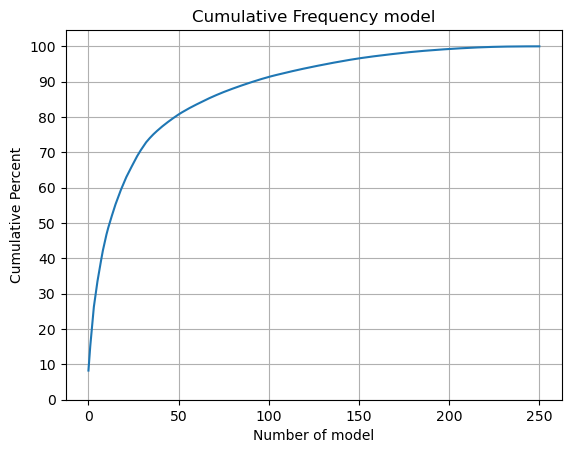

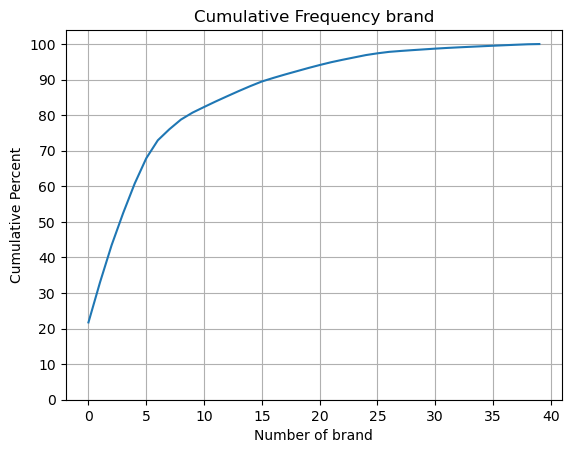

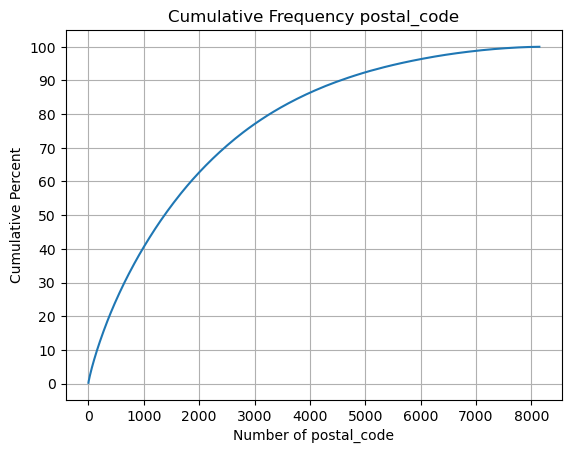

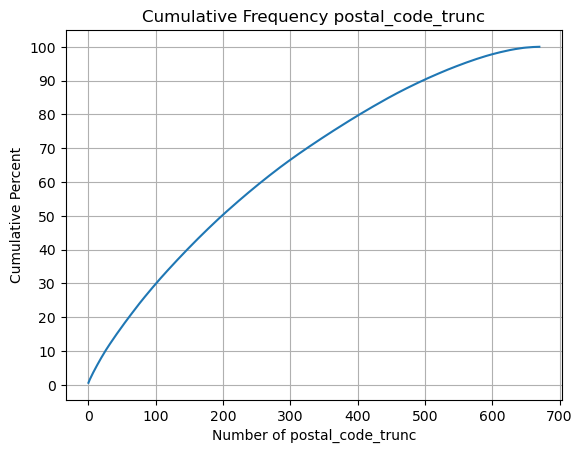

In [521]:
# plot cdf of model, brand, and postal_code
freq_large = [freq_model, freq_brand, freq_postal, freq_postal_trunc]

for freq_table in freq_large:
    plt.plot(freq_table['cumulative_percent'])
    
    plt.title(f'Cumulative Frequency {freq_table.columns[0]}')
    plt.ylabel('Cumulative Percent')
    plt.xlabel(f'Number of {freq_table.columns[0]}')
    plt.yticks(np.arange(0, 101, 10))
    plt.grid(visible=True)
    
    plt.show()

*<b>Model:</b>* About 80% of models are explained by the first 50 models. About 95% of models are explained by the first 125 models.  

*<b>Brand:</b>* About 85% of brands are explained by the first 10 brands. About 95% of brands are explained by the first 20 brands.  

*<b>Postal code:</b>* About 85% of all postal codes are explained by the first 3500 postal codes. About 95% of postal codes are explained by the first 6000 postal codes.  

*<b>Postal code (truncated 100):</b>* About 85% of all postal codes are explained by the first 450 postal codes. About 95% of all postal codes are explained by the first 550 postal codes.

Model could be reduced to the first 50 or 125 categories. Brand can be reduced to the first 10 - 20 brands. Postal code was better reduced by truncating to the 100s place and doesn't have a clear further further reduction.

##### Numeric features

*Descriptive statistics*

Check numeric variables for correct values.

In [522]:
# Descriptive statistics of quantitative variables
cols_numeric = ['price', 'registration_year', 'power', 'mileage', 'registration_month', 'number_of_pictures']

cars[cols_numeric].describe().round(2)

,price,registration_year,power,mileage,registration_month,number_of_pictures
count,354107.00,354107.00,354107.00,354107.00,354107.00,354107.0
mean,4416.43,2004.24,110.09,128211.81,5.71,0.0
std,4514.34,90.26,189.91,37906.59,3.73,0.0
min,0.00,1000.00,0.00,5000.00,0.00,0.0
25%,1050.00,1999.00,69.00,125000.00,3.00,0.0
50%,2700.00,2003.00,105.00,150000.00,6.00,0.0
75%,6400.00,2008.00,143.00,150000.00,9.00,0.0
max,20000.00,9999.00,20000.00,150000.00,12.00,0.0


Minimum and maximum values for registration_year, power, and number_of_pictures are outside the range of possible values. 

*<b>Registration_year:</b>* Ranges from 1000 to 9999 and should not be less than 1900 or more than 2023.  
*<b>Power:</b>* Ranges fro 0 to 20000 and should not be less than 1 or more than 2000.   

Values outside those ranges were likely mis-entered and will be cleaned from the dataset. 

*<b>Pictures:</b>* All cars have 0 pictures. This was likely not recorded on the website or not downloaded correctly from the site. This variable will removed from the analysis.

*Registration_year*

Examine registration year distribution and delete incorrect values.

In [559]:
# Print values of registriation year
freq_reg = freq_table(cars, 'registration_year')

print('Frequency table of registration_year:')
display(freq_reg[['registration_year', 'count', 'percent']].sort_values(by='registration_year'))

Frequency table of registration_year:


,registration_year,count,percent
60,1000,37,0.010449
148,1001,1,0.000282
111,1039,1,0.000282
92,1111,3,0.000847
139,1200,1,0.000282
84,1234,4,0.001130
128,1253,1,0.000282
142,1255,1,0.000282
102,1300,2,0.000565
129,1400,1,0.000282


There are multiple mis-entered values below 1900 and above 2023. These values likely all represent mis-entered or unknown and will be replaced with nan.

In [561]:
# Replace registrations years < 1900 and > 2023 with nan
def reg_year_bound(x):
    if x < 1900:
        return np.nan
    elif x > 2023:
        return np.nan
    else:
        return x

# apply year function
cars['registration_year'] = cars['registration_year'].apply(reg_year_bound)

print('Updated registration_year descriptives')
display(cars['registration_year'].describe().round(2))

Updated registration_year statistics


count    353936.00
mean       2003.08
std           7.54
min        1910.00
25%        1999.00
50%        2003.00
75%        2008.00
max        2019.00
Name: registration_year, dtype: float64

Registration year now ranges from 1910 - 2019. These are all possible values for car registration year. The problem with the registration year values has been fixed.

*Power*

Examine power values and remove incorrect values.

In [562]:
# Frequency table for power
freq_power = freq_table(cars, 'power')

print('Frequency table for power:')
display(freq_power[['power', 'count', 'percent']].sort_values(by='power'))

Frequency table for power:


,power,count,percent
0,0,40218,11.357584
228,1,34,0.009602
305,2,10,0.002824
309,3,9,0.002542
241,4,30,0.008472
162,5,103,0.029087
293,6,11,0.003106
290,7,11,0.003106
327,8,7,0.001977
343,9,5,0.001412


There are over 40,000 cars listed at 0 and multiple values above 2200. These are likely unknown or mis-entered and will be replaced with nan.

In [564]:
# Replace power below 1 and above 2200 with nan
def power_bound(x):
    if x < 1:
        return np.nan
    elif x > 2200:
        return np.nan
    else:
        return x
    
# apply function
cars['power'] = cars['power'].apply(power_bound)

print('Updated power descriptives:')
cars['power'].describe()

Updated power descriptives:


count    313769.000000
mean        121.084734
std          64.298036
min           1.000000
25%          75.000000
50%         110.000000
75%         150.000000
max        2000.000000
Name: power, dtype: float64

Power now range from 1 to 2200. These are all possible values for power. The problem with power values has been fixed.

##### Re-assess missing values

After replacing incorrect values with nan, re-assess missing values and impute as necessary.

In [463]:
# Re-assess missing values
missing_new = cars.isna().sum().to_frame().rename(columns={0:'count'})
missing_new['proportion'] = (missing_new / len(cars)).round(2)

display(missing_new)

,count,proportion
date_crawled,0,0.00
price,0,0.00
vehicle_type,0,0.00
registration_year,171,0.00
gearbox,0,0.00
power,40338,0.11
model,0,0.00
mileage,0,0.00
registration_month,0,0.00
fuel_type,0,0.00


Registration_year and power are both missing around 10% of data or less. Their values can be imputed with mean or median, depending on the shape of the distribution.

*Examine ditributions*

Examine distributions of registiration_year and power for imputation.

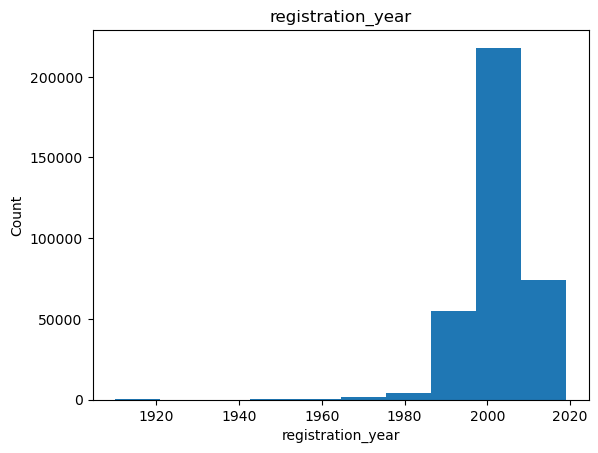

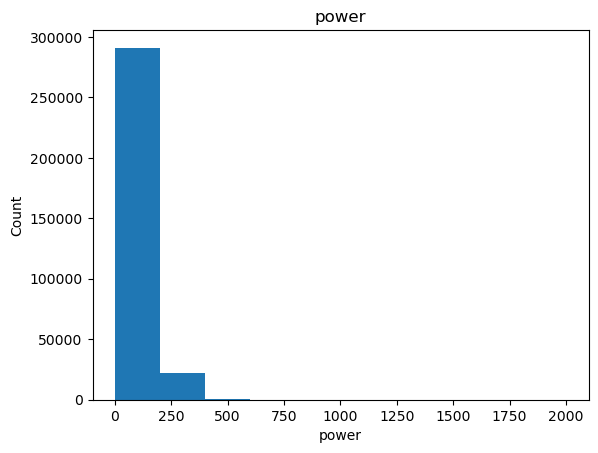

In [464]:
# Display histograms for registration_year and power
cols_missing = ['registration_year', 'power']

for col in cols_missing:
    plt.hist(cars[col])
    plt.title(f'{col}')
    plt.ylabel('Count')
    plt.xlabel(f'{col}')
    plt.show()

Registration year and power are both highly skewed. Missing values will be imputed with the median.

*Impute*

Impute missing power and registration_year with the median.

In [566]:
# Impute missing values in registration_year and power with median 
for col in cols_missing:
    cars[col] = cars[col].fillna(cars[col].median())
    
# Re-print missing values
missing_new_2 = cars.isna().sum().to_frame().rename(columns={0:'count'})
missing_new_2['proportion'] = (missing_new_2 / len(cars)).round(2)

print('Udated missing values:')
display(missing_new_2)

Udated missing values:


,count,proportion
date_crawled,0,0.0
price,0,0.0
vehicle_type,0,0.0
registration_year,0,0.0
gearbox,0,0.0
power,0,0.0
model,0,0.0
mileage,0,0.0
registration_month,0,0.0
fuel_type,0,0.0


All missing values have been filled.

### Prepare data conclusions

* Dates were changed to datetime, missing strings filled with 'unknown', and duplicates cleaned from the dataset.   
* Brand can be reduced to 10 - 20 categories, model can be reduced to 50 - 125 categories, and zipcode can be truncated to the 100s place.   
* Incorrect values for registration_year and power were replaced with nan and then filled with the respective medians.   
* The data is prepared and ready for analysis.

## **Exploratory Analysis**<a id='explore'></a>

### Density plots

Display density plot for each numeric column and examine distribution.

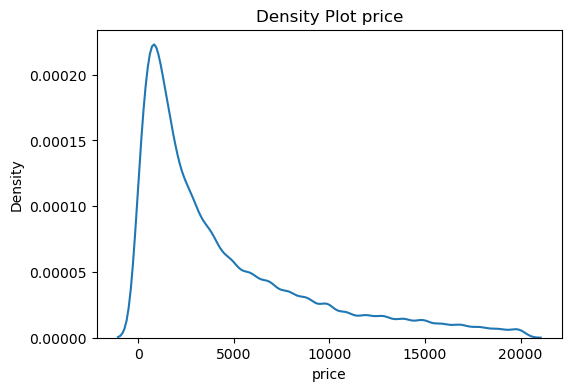

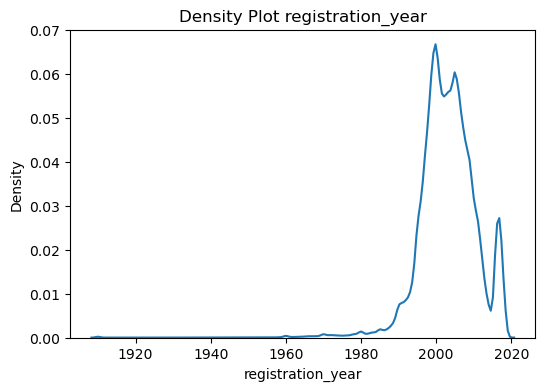

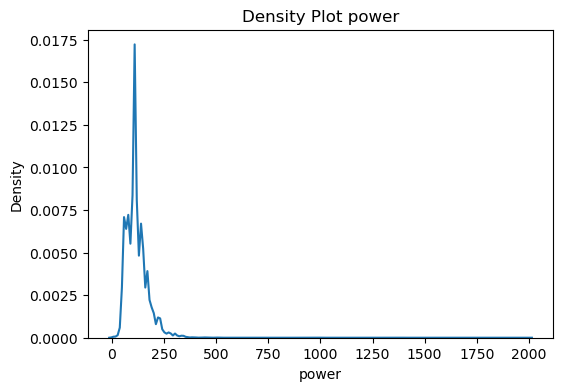

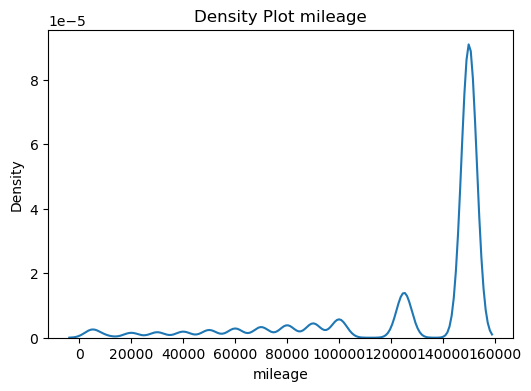

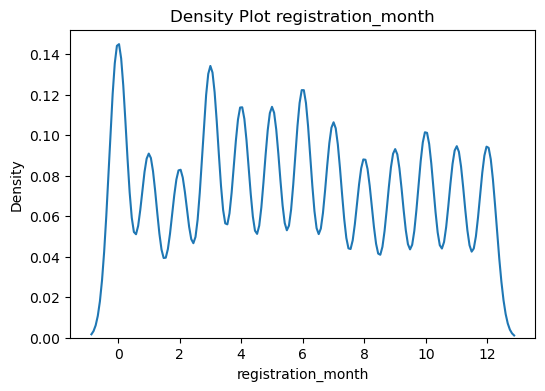

In [605]:
# For each numeric column, display density plot
cols_numeric = ['price', 'registration_year', 'power', 'mileage', 'registration_month']

for col in cols_numeric:
    plt.figure(figsize=(6, 4))
    density = sns.kdeplot(cars[col])
    density.set(title=f'Density Plot {col}')
    
    plt.show()

Price, registration year, power, and mileage are all skewed distributions. Registration month has a fairly uniform distribution. The skew in the independent and dependent variables make this a good candidate for non-parametric mdoels.

### Pairplot and correlations

Display pairplot and correlation matrix of numeric columns.

/Users/kellyshreeve/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


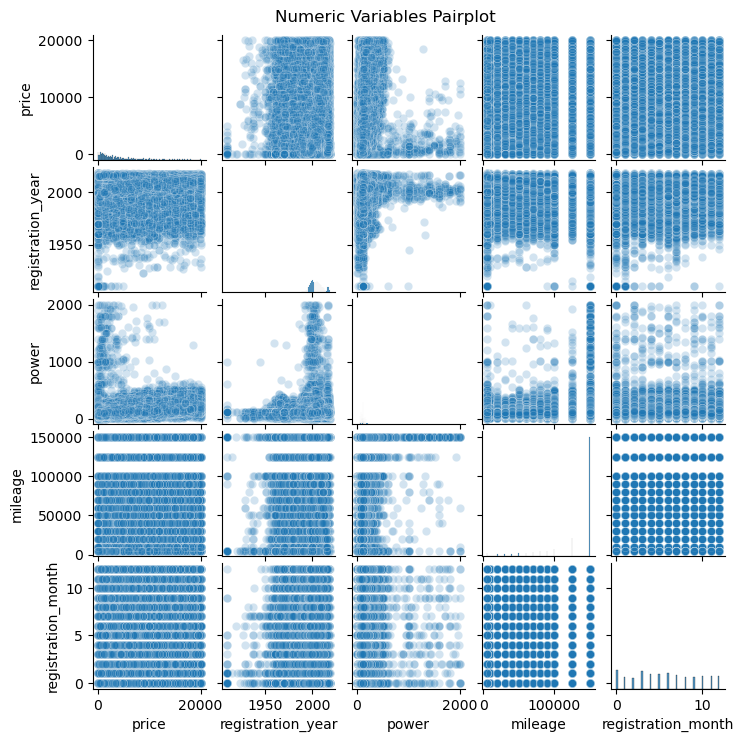

In [608]:
# Display pairplot
pairplot = sns.pairplot(cars[cols_numeric], plot_kws={'alpha':0.2})
pairplot.fig.suptitle('Numeric Variables Pairplot', y=1.02)
pairplot.fig.set_size_inches(7, 7)

plt.show()

There are no clear associations between price and registriation_year, power, mileage, or registration_month. There is also a possible violation of linearity between price and power. There are no clear associations among the independent variables, showing that multicolinearity is likely not an issue.

Text(0.5, 1.0, 'Numeric Variables Correlation Heatmap')

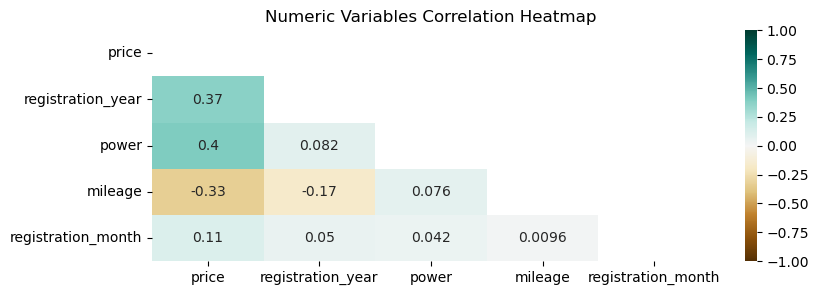

In [593]:
# Correlation matrix
corr_matrix = cars[cols_numeric].corr()
corr_triangle = np.triu(np.ones_like(corr_matrix))

# Correlation heatmap
plt.figure(figsize=(9, 3))
heatmap = sns.heatmap(corr_matrix, mask=corr_triangle, vmin=-1, vmax=1, 
            annot=True, cmap='BrBG')
heatmap.set_title('Numeric Variables Correlation Heatmap')

Price has a moderate, positive correlation with registration year (r = 0.37) and power (r = 0.40). Price has a moderate, negative correlation with mileage(r = -0.33). Price is only weakly related to registration month (r = 0.11).

The features registration year, power, and mileage are very weakly correlated with each other. Multicollinearity is not an issue.

## **Models**